# **1. Problem statement**

Given dataset is about various Netflix series and movies and their various features.
Task 1. Try to find some more features through data mining techniques and feature engineering to get better quality analysis.

Task 2, using the clustering techniques, prepare clusters from the data and by finding the unique features from those clusters, provide suggestions to Netflix on how they can give better recommendations and improve their business and App.


# **2. Importing the libraries and the dataset**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
original_df = pd.read_csv('netflix_titles.csv')
df = original_df.copy()

# **3. Understanding data**

In [ ]:
# top 5 rows
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## <b> 3.1. Attribute Information </b>
1. **show_id** : Unique ID for every movie / tv show
2. **type** : Identifier - A movie or TV show
3. **title** : Title of the movie / TV show
4. **director** : Director of the movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual release year of the movie / show
9. **rating** : TV rating of the movie / show
10. **duration** : Total duration - in minutes or number of seasons
11. **listed_in** : Genres
12. **description**: The summary description
13.**month**: Column extracted from date_added column
14.**decade**: Column extracted from relese_year column

# **4. Cleaning data:**

## **4.1. Checking for duplicate records**

In [ ]:
# Checking for duplicate records
df.duplicated().value_counts()

False    8807
dtype: int64

**There are no duplicated records in the dataset.**

In [ ]:
# Checking the unique values in each attribute of the dataset
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## **4.2. Checking for missing values and handling them**

In [ ]:
# Missing values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**There are many missing values in director, cast, country columns and there are a few missing values in date_added, duration and rating columns.**

## **4.3. Data extraction**

### **FROM WIKI**

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
#Read the dataset from the CSV file
df = pd.read_csv('netflix_dataset_filled_imdb.csv')

In [ ]:
# Function to scrape Wikipedia for director of a show
def get_director_wikipedia(title):
    url = f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}"
    print("Scraping URL:", url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    director_tag = soup.find("th", text="Directed by")
    if director_tag:
        director = director_tag.find_next("td").text.strip()
        return director
    else:
        return None

# Fill missing director values using web scraping from Wikipedia
for index, row in df.iterrows():
    if pd.isnull(row['director']):
        director = get_director_wikipedia(row['title'])
        df.at[index, 'director'] = director
        print(f"Director for '{row['title']}': {director}")

# Display the updated dataframe
print(df)

Scraping URL: https://en.wikipedia.org/wiki/Blood_&_Water
Director for 'Blood & Water': None
Scraping URL: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
Director for 'Jailbirds New Orleans': None
Scraping URL: https://en.wikipedia.org/wiki/Kota_Factory
Director for 'Kota Factory': Raghav Subbu
Scraping URL: https://en.wikipedia.org/wiki/Vendetta:_Truth,_Lies_and_The_Mafia
Director for 'Vendetta: Truth, Lies and The Mafia': None
Scraping URL: https://en.wikipedia.org/wiki/Crime_Stories:_India_Detectives
Director for 'Crime Stories: India Detectives': N AmitJack Rampling
Scraping URL: https://en.wikipedia.org/wiki/Dear_White_People
Director for 'Dear White People': Justin Simien
Scraping URL: https://en.wikipedia.org/wiki/Falsa_identidad
Director for 'Falsa identidad': Conrado Martínez
Diego Muñoz
Jorge Rios
Scraping URL: https://en.wikipedia.org/wiki/Jaguar
Director for 'Jaguar': None
Scraping URL: https://en.wikipedia.org/wiki/Resurrection:_Ertugrul
Director for 'Resurrection: Er

In [ ]:
# Function to scrape Wikipedia for cast of a show
def get_cast_wikipedia(title):
    url = f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}"
    print("Scraping URL:", url)
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        starring_tag = soup.find("th", text="Starring")
        if starring_tag:
            # Assuming the cast is listed in an unordered list following the Starring section
            cast_links = []
            ul_tag = starring_tag.find_next("td").find("ul")
            if ul_tag:
                for li in ul_tag.find_all("li"):
                    # Extract text content and URL from each list item
                    actor = li.get_text().strip()
                    link = li.find("a")["href"] if li.find("a") else None
                    cast_links.append((actor, link))
                return cast_links
            else:
                print("Cast list not found after the Starring section.")
                return None
        else:
            print("Starring section not found on the page.")
            return None
    except requests.RequestException as e:
        print("Error scraping Wikipedia:", e)
        return None

# Fill missing cast values using web scraping from Wikipedia
for index, row in df.iterrows():
    if pd.isnull(row['cast']):
        cast = get_cast_wikipedia(row['title'])
        if cast:
            # Concatenate names and links into a single string
            cast_str = ', '.join([f"{actor} ({link})" if link else actor for actor, link in cast])
            df.at[index, 'cast'] = cast_str
            print(f"Cast for '{row['title']}': {cast_str}")
        else:
            print(f"No cast information found for '{row['title']}'.")

# Display the updated dataframe
print(df)

Scraping URL: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
No cast information found for 'Jailbirds New Orleans'.
Scraping URL: https://en.wikipedia.org/wiki/Raja_Rasoi_Aur_Anya_Kahaniyan
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/Raja_Rasoi_Aur_Anya_Kahaniyan
No cast information found for 'Raja Rasoi Aur Anya Kahaniyan'.
Scraping URL: https://en.wikipedia.org/wiki/Final_Account
Starring section not found on the page.
No cast information found for 'Final Account'.
Scraping URL: https://en.wikipedia.org/wiki/Luv_Kushh
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/Luv_Kushh
No cast information found for 'Luv Kushh'.
Scraping URL: https://en.wikipedia.org/wiki/Untold:_Crime_&_Penalties
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/w

In [ ]:
# Function to scrape Wikipedia for country of origin of a show
def get_country_wikipedia(title):
    url = f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}"
    print("Scraping URL:", url)
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        country_tag = soup.find("th", text=lambda text: text in ["Country of origin", "Country"])
        if country_tag:
            # Assuming the country information is listed in a table cell following the section
            country = country_tag.find_next("td").get_text().strip()
            return country
        else:
            print("Country information section not found on the page.")
            return None
    except requests.RequestException as e:
        print("Error scraping Wikipedia:", e)
        return None

# Fill missing country values using web scraping from Wikipedia
for index, row in df.iterrows():
    if pd.isnull(row['country']):
        country = get_country_wikipedia(row['title'])
        df.at[index, 'country'] = country
        if country:
            print(f"Country information for '{row['title']}': {country}")
        else:
            print(f"No country information found for '{row['title']}'.")

# Display the updated dataframe
print(df)

Scraping URL: https://en.wikipedia.org/wiki/Ganglands
Country information for 'Ganglands': France
Scraping URL: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
No country information found for 'Jailbirds New Orleans'.
Scraping URL: https://en.wikipedia.org/wiki/Midnight_Mass
Country information section not found on the page.
No country information found for 'Midnight Mass'.
Scraping URL: https://en.wikipedia.org/wiki/My_Little_Pony:_A_New_Generation
Country information section not found on the page.
No country information found for 'My Little Pony: A New Generation'.
Scraping URL: https://en.wikipedia.org/wiki/Vendetta:_Truth,_Lies_and_The_Mafia
Country information for 'Vendetta: Truth, Lies and The Mafia': Italy
Scraping URL: https://en.wikipedia.org/wiki/Bangkok_Breaking
Error scraping Wikipedia: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/Bang

* There are 2634 missing values in the director column and 1126 values are extracted and there are still 1508 values missing.
* There are 825 missing values in the cast column and 663 values are extracted and there are still 162 values missing.
* There are 831 missing values in the country column and 223 values are extracted and there are still 608 values missing.
* The remaining missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* The records with missing values in the date_added and duration columns can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

## **Extracting columns**

In [ ]:
import re

# Function to categorize items based on keywords
def categorize_item(item):
    if pd.isna(item):
        return 'Unknown'

    keywords = {
        'January': ['Jan', 'January'],
        'February': ['Feb', 'February'],
        'March': ['Mar', 'March'],
        'April': ['Apr', 'April'],
        'May': ['May'],
        'June': ['Jun', 'June'],
        'July': ['Jul', 'July'],
        'August': ['Aug', 'August'],
        'September': ['Sep', 'September'],
        'October': ['Oct', 'October'],
        'November': ['Nov', 'November'],
        'December': ['Dec', 'December'],
    }

    for category, category_keywords in keywords.items():
        for keyword in category_keywords:
            try:
                if re.search(keyword, str(item), re.IGNORECASE):
                    return category
            except TypeError:
                pass

    return 'Unknown'

# Apply categorization to each item in the 'date_added' column
df['Month'] = df['date_added'].apply(categorize_item)

# Display the updated DataFrame
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water             None   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans             None   
4         s5  TV Show           Kota Factory     Raghav Subbu   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb             None   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0     Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                                   NaN           None   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN           None   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description      Month  
0     As her father nears the end of his life, filmm...  September  
1     After crossing paths at a party, a Cape Town t...  September  
2     To protect his family from a powerful drug lor...  September  
3     Feuds, flirtations and toilet talk go down amo...  September  
4     In a city of coaching centers known to train I...  September  
...                                                 ...        ...  
8802  A political cartoonist, a crime reporter and a...   November  
8803  While living alone in a spooky town, a young g...       July  
8804  Looking to survive in a world taken over by zo...   November  
8805  Dragged from civilian life, a former superhero...    January  
8806  A scrappy but poor boy worms his way into a ty...      March  

[8807 rows x 13 columns]

In [ ]:
df['Decade'] = (df['release_year'] // 10) * 10
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water             None   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans             None   
4         s5  TV Show           Kota Factory     Raghav Subbu   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb             None   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0     Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                                   NaN           None   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN           None   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description      Month  Decade  
0     As her father nears the end of his life, filmm...  September    2020  
1     After crossing paths at a party, a Cape Town t...  September    2020  
2     To protect his family from a powerful drug lor...  September    2020  
3     Feuds, flirtations and toilet talk go down amo...  September    2020  
4     In a city of coaching centers known to train I...  September    2020  
...                                                 ...        ...     ...  
8802  A political cartoonist, a crime reporter and a...   November    2000  
8803  While living alone in a spooky town, a young g...       July    2010  
8804  Looking to survive in a world taken over by zo...   November    2000  
8805  Dragged from civilian life, a former superhero...    January    2000  
8806  A scrappy but poor boy worms his way into a ty...   

In [ ]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water             None   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans             None   
4         s5  TV Show           Kota Factory     Raghav Subbu   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb             None   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0     Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                                   NaN           None   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN           None   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description      Month  Decade  
0     As her father nears the end of his life, filmm...  September    2020  
1     After crossing paths at a party, a Cape Town t...  September    2020  
2     To protect his family from a powerful drug lor...  September    2020  
3     Feuds, flirtations and toilet talk go down amo...  September    2020  
4     In a city of coaching centers known to train I...  September    2020  
...                                                 ...        ...     ...  
8802  A political cartoonist, a crime reporter and a...   November    2000  
8803  While living alone in a spooky town, a young g...       July    2010  
8804  Looking to survive in a world taken over by zo...   November    2000  
8805  Dragged from civilian life, a former superhero...    January    2000  
8806  A scrappy but poor boy worms his way into a ty...   

## **4.4. Handling missing values**

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.shape

(8794, 14)

We have successfully handled all the missing values in the dataset.

## **Country, listed_in**

In [ ]:
# Top countries
df.country.value_counts()

United States                   2878
India                           1006
Unknown                          608
United Kingdom                   424
Japan                            253
                                ... 
Philippines, United States         1
Romania, Bulgaria, Hungary         1
Uruguay, Guatemala                 1
France, Senegal, Belgium           1
United Arab Emirates, Jordan       1
Name: country, Length: 769, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# contry in which a movie was produced
df.country.value_counts()

United States               3271
India                       1042
United Kingdom               633
Unknown                      608
Canada                       272
                            ... 
Puerto Rico                    1
South KoreaUnited States       1
Cyprus                         1
Brazil\nUnited Kingdom         1
Somalia                        1
Name: country, Length: 107, dtype: int64

In [ ]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            54
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

## **4.5. Typecasting 'duration' from string to integer**

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 90,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,  97,
       106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,  88,
       100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,  92,
        80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154, 120,
        82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135, 136,
       165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148, 189,
       141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,  39,
        46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,
        58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,
        15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,
        21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,  57,
        28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17, 203,
        41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180,
       144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  11, 19

In [ ]:
# datatype of duration
df.duration.dtype

dtype('int64')

## **4.6. Typecasting 'date_added' from string to datetime**

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

# **5. Visualizations**

## **5.1. Univariate Analysis**

**5.1.1. Type**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

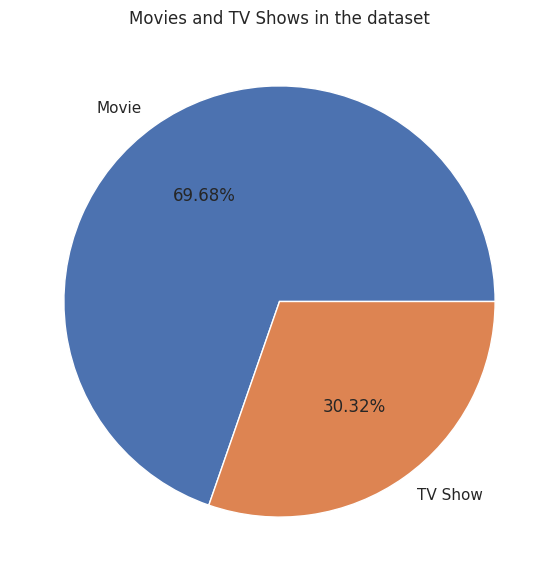

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

* **There are more movies (69.14%) than TV shows (30.86%)  in the dataset.**

**5.1.2. Director**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

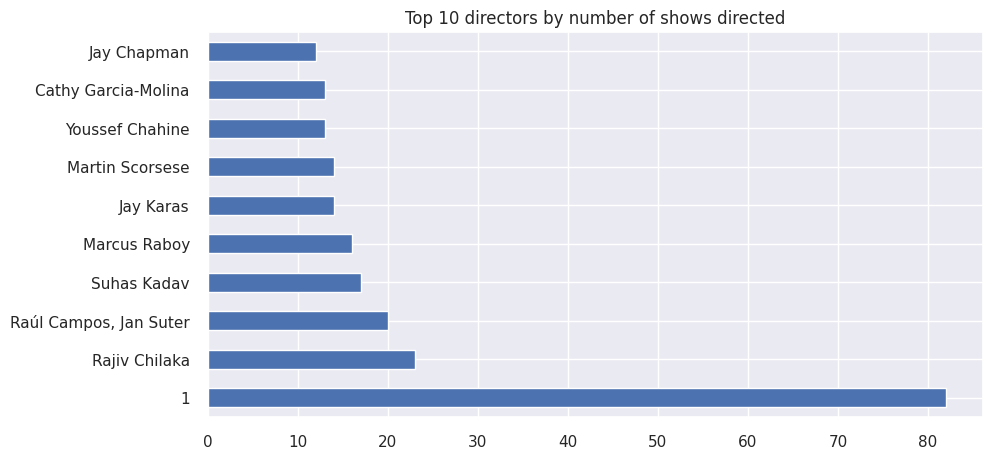

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

* **Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

**5.1.3. Listed_In (Genres)**

Text(0.5, 1.0, 'Top 10 genres')

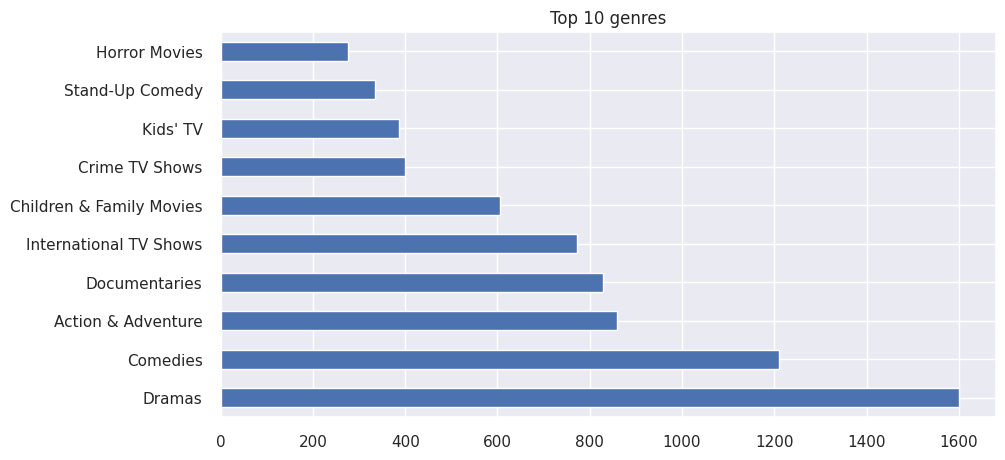

In [ ]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

* **The dramas is the most viewed genre followed by comedies and documentaries.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.7216283829884

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.67000227427792

## **5.2. Bivariate analysis**

**5.2.1. Comparing number of Movies and TV Shows released in each country**

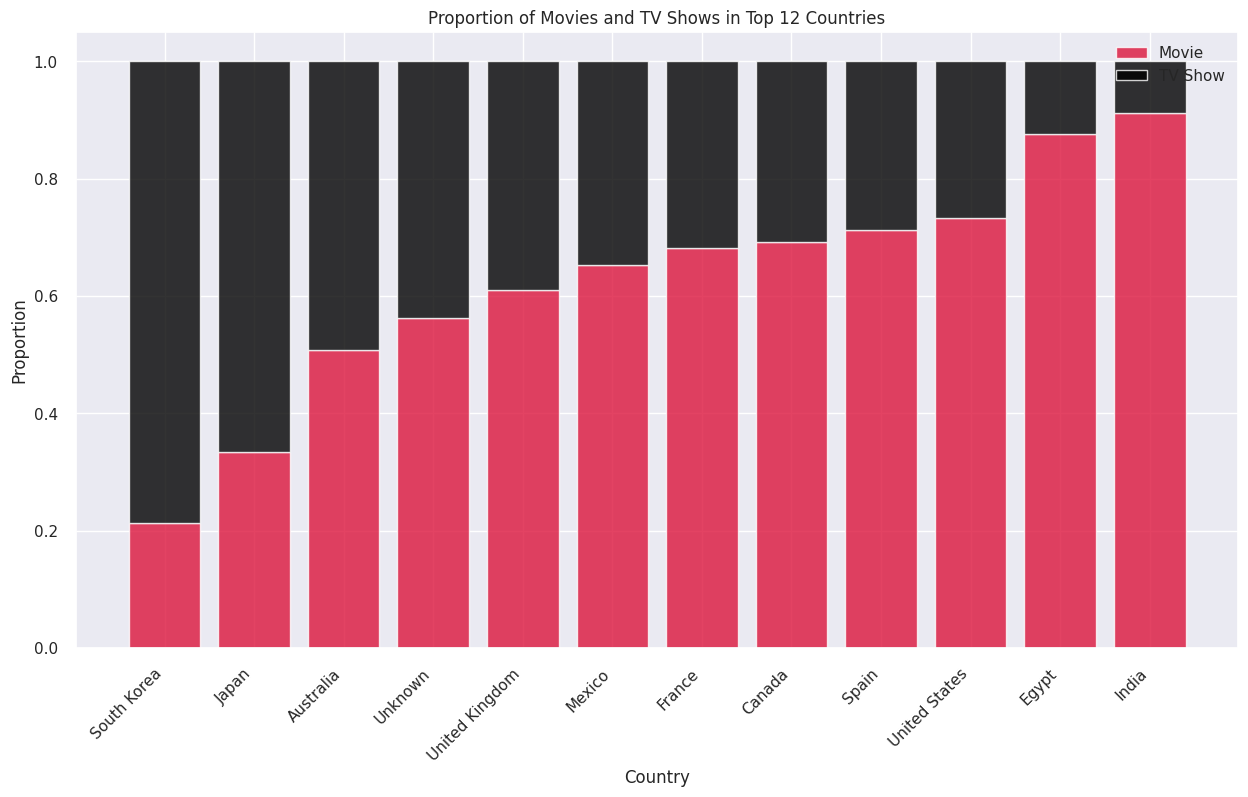

In [ ]:
#Bar plot for country
country_order = df['country'].value_counts()[:12].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

# Plotting the vertical bar plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.bar(content_data_ratio.index, content_data_ratio['TV Show'], bottom=content_data_ratio['Movie'],
       color='black', alpha=0.8, label='TV Show')

# Adding labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Movies and TV Shows in Top 12 Countries')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding legend
ax.legend()

# Display the plot
plt.show()


India has more number of releases in case of movies compared to TV shows while South Korea has more number of releases in case of TV shows compared to movies.

**5.2.2. Number of TV shows and movies released in each decade**

In [ ]:
content_counts_per_decade = df.groupby(['Decade', 'type']).size().unstack(fill_value=0)

<Figure size 1400x800 with 0 Axes>

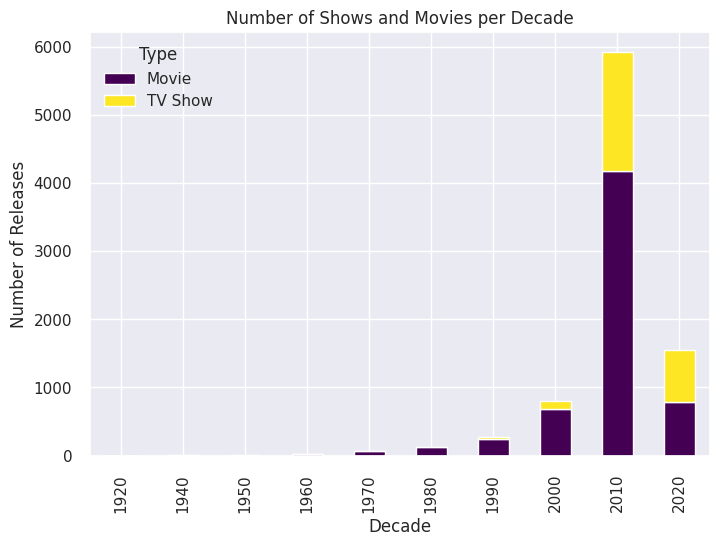

In [ ]:
plt.figure(figsize=(14, 8))
content_counts_per_decade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Shows and Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Releases')
plt.legend(title='Type', loc='upper left')
plt.show()

**The number of releases over the decades increased exponentially till the decade 2010 and the data from 2020 decade is incomplete but there are high chances that the number of releases may exceed the previous decades.**

**5.2.3. Change of rating in each decade**

In [ ]:
rating_counts_per_decade = df.groupby(['Decade', 'rating']).size().unstack(fill_value=0)

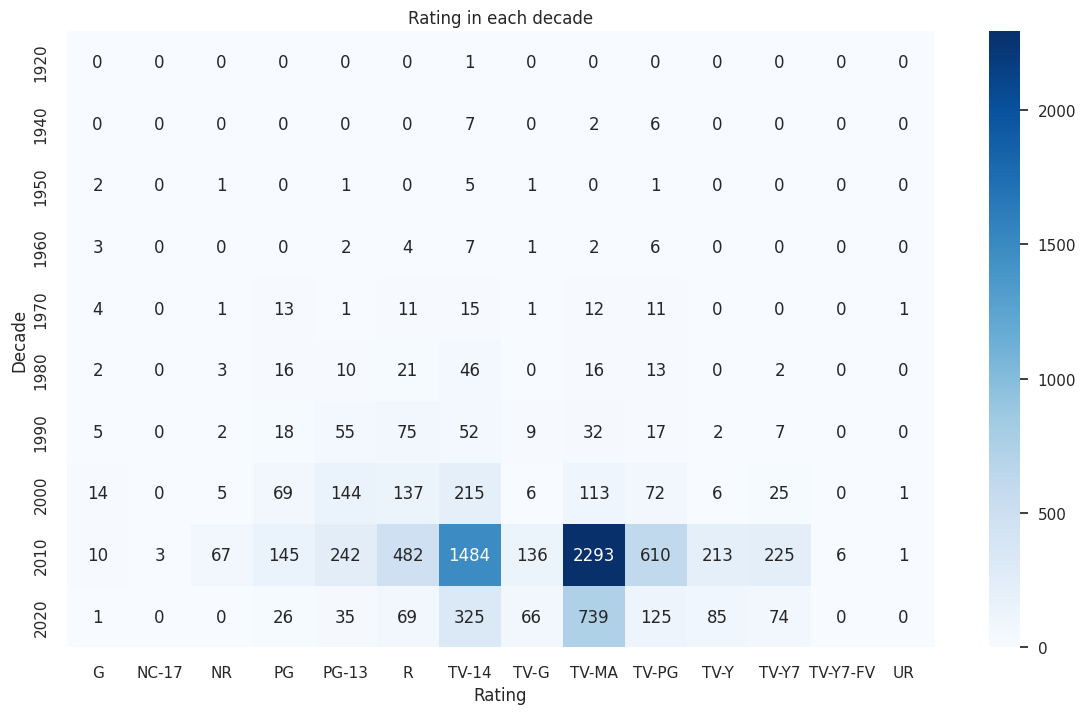

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(rating_counts_per_decade, annot=True, cmap='Blues', fmt='g')
plt.title('Rating in each decade')
plt.xlabel('Rating')
plt.ylabel('Decade')
plt.show()

**There are more number of movies and TV shows released in TV-MA category since 2010 compared to other rating categories.**

**5.2.4. Duration of TV shows**

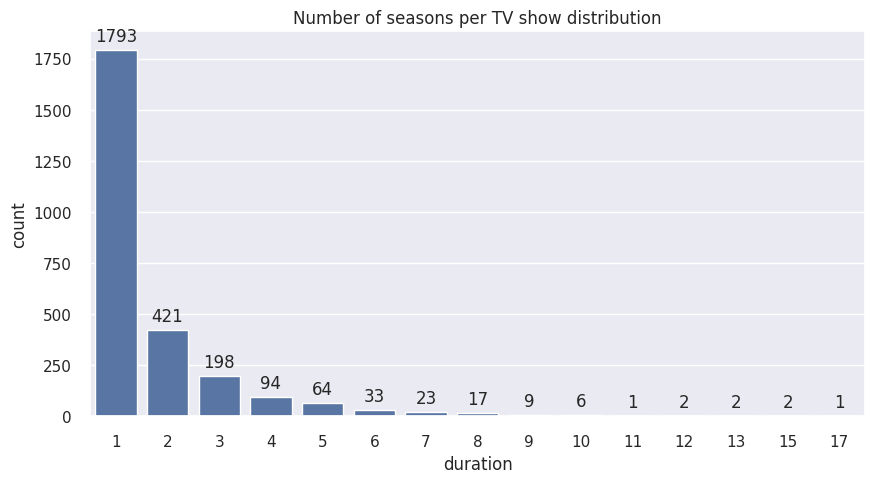

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* **The TV series in the dataset have up to 17 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

In [ ]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.2543135783946

**5.2.5. Duration of Movies**

Text(0.5, 1.0, 'Movie duration distribution')

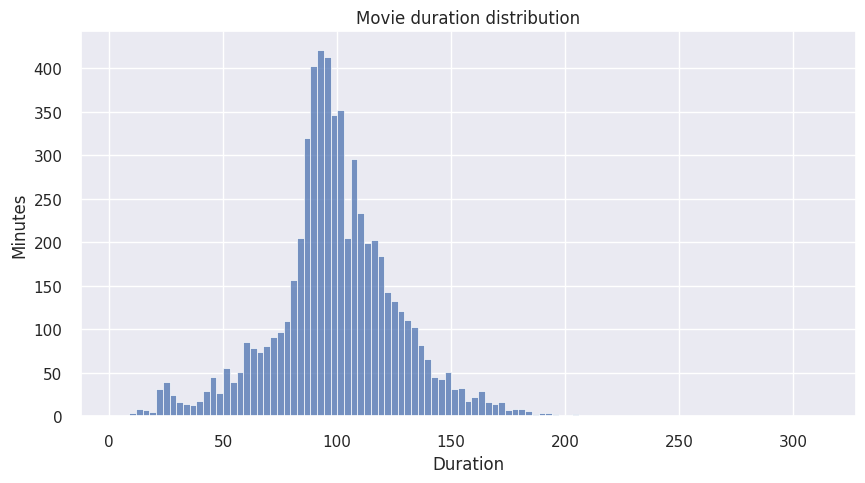

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.xlabel('Duration')
plt.ylabel('Minutes')
plt.title('Movie duration distribution')

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

**5.2.6. Actors (cast) appeared in highest number of movies**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

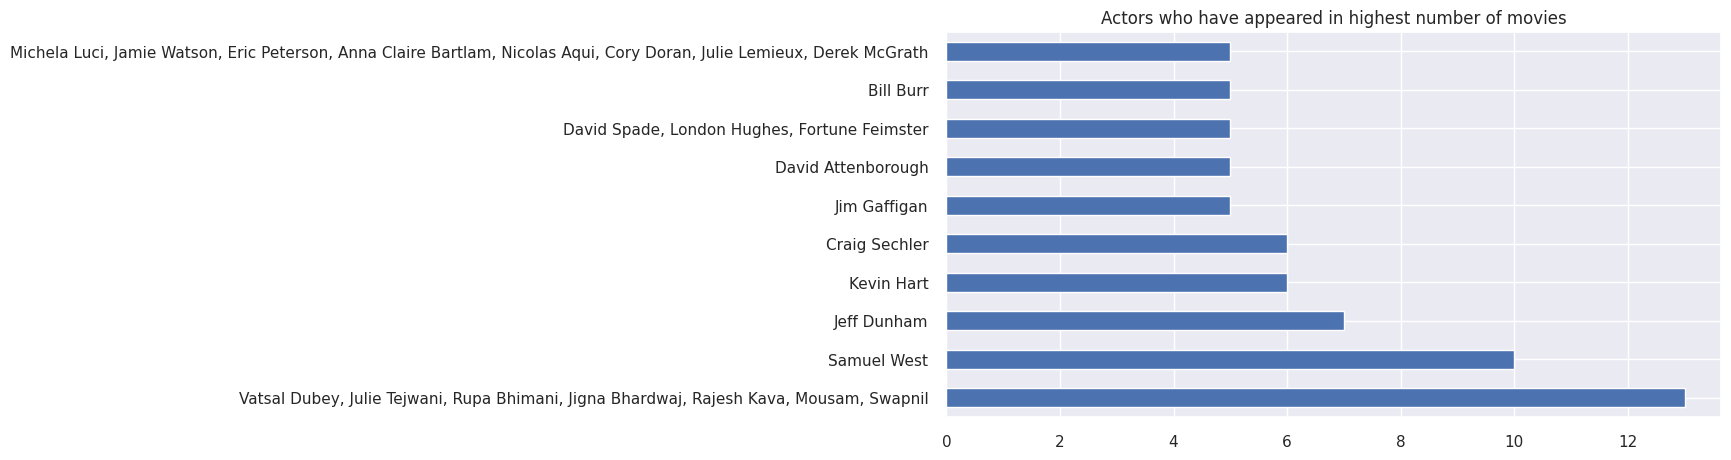

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

**5.2.7. Actors (cast) appeared in highest number of TV shows**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

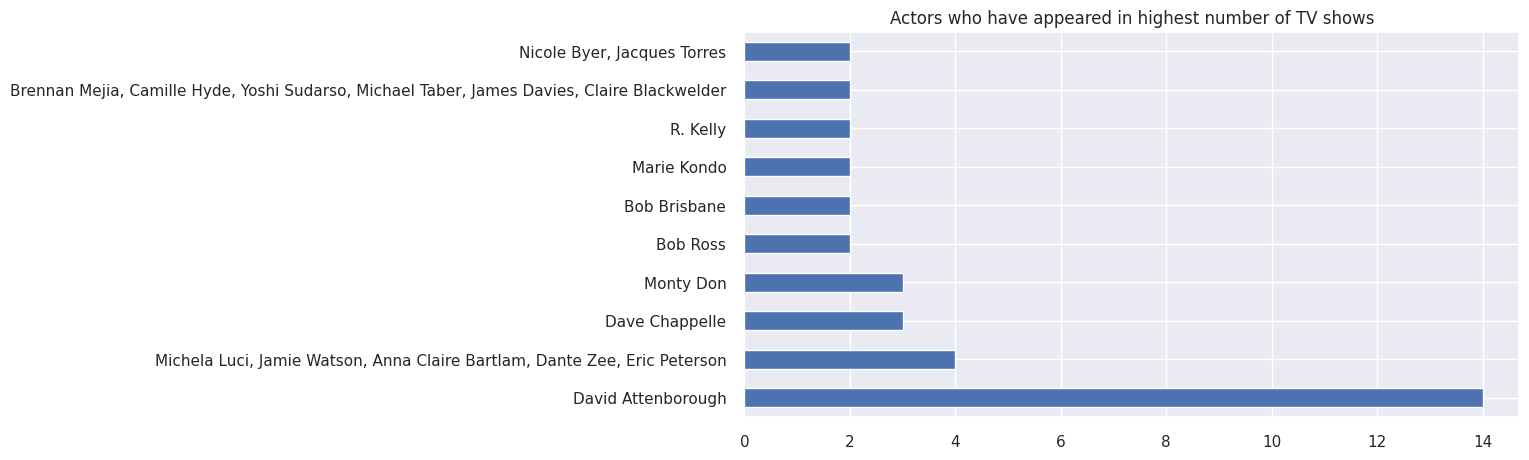

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* **David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.**

## **5.3. Multivariate Analysis**

**5.3.1. Average Runtime of movies and TV shows per decade**

In [ ]:
average_runtime_per_decade = df.groupby(['Decade', 'type'])['duration'].mean().reset_index()

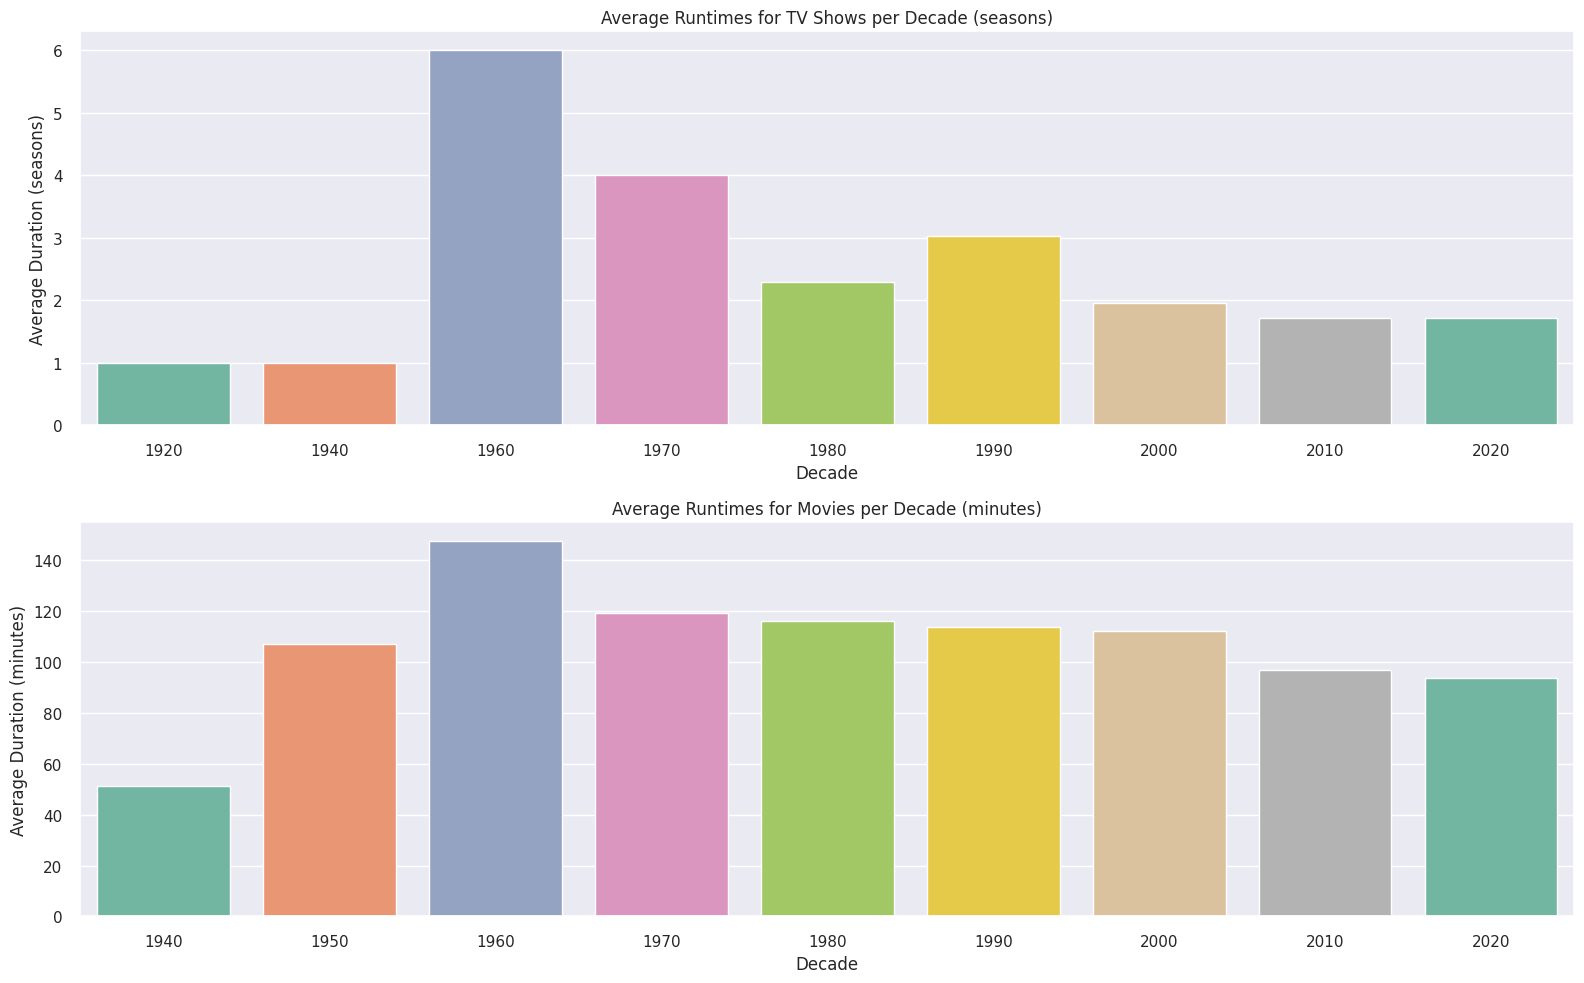

In [ ]:
# Filter data for TV shows and movies
tv_shows_data = average_runtime_per_decade[average_runtime_per_decade['type'] == 'TV Show']
movies_data = average_runtime_per_decade[average_runtime_per_decade['type'] == 'Movie']

# Create separate plots for TV shows and movies
plt.figure(figsize=(16, 10))

# Plotting average runtime per decade for TV shows
plt.subplot(2, 1, 1)
sns.barplot(x='Decade', y='duration', data=tv_shows_data, palette='Set2')
plt.title('Average Runtimes for TV Shows per Decade (seasons)')
plt.xlabel('Decade')
plt.ylabel('Average Duration (seasons)')

# Plotting average runtime per decade for movies
plt.subplot(2, 1, 2)
sns.barplot(x='Decade', y='duration', data=movies_data, palette='Set2')
plt.title('Average Runtimes for Movies per Decade (minutes)')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The duration for the TV shows and movies started decreasing from the year 1960. So, it can be said that less duration TV shows and movies are prefered after 1960's.




# **6. Hypothesis Testing**

**TEST 1**

HO:movies rated for kids and older kids are at least two hours long.
H1:movies rated for kids and older kids are not at least two hours long.

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['Age_Group'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['Age_Group'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids'], dtype=object)

In [ ]:
df_hypothesis.head()

show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
7       s8  Movie                           Sankofa   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
7                    Haile Gerima   
9                  Theodore Melfi   
12            Christian Schwochow   

                                                 cast        country  \
0   Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  United States   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...  United States   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...        Germany   

    release_year rating  duration                 listed_in  \
0           2020  PG-13        90             Documentaries   
6           2021     PG        91  Children & Family Movies   
7           1993  TV-MA       125                    Dramas   
9           2021  PG-13       104                  Comedies   
12          2021  TV-MA       127                    Dramas   

                                          description      Month  Decade  \
0   As her father nears the end of his life, filmm...  September    2020   
6   Equestria's divided. But a bright-eyed hero be...  September    2020   
7   On a photo shoot in Ghana, an American model s...  September    1990   
9   A woman adjusting to life after a loss contend...  September    2020   
12  After most of her family is murdered in a terr...  September    2020   

    month_added  year_added   Age_Group  
0             9        2021       Teens  
6             9        2021  Older Kids  
7             9        2021      Adults  
9             9        2021       Teens  
12            9        2021      Adults

In [ ]:
# Check the data types of the 'duration' column
print(df_hypothesis['duration'].dtype)

# Convert non-string values to string
df_hypothesis['duration'] = df_hypothesis['duration'].astype(str)

# Extract the numeric part from the 'duration' column
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the 'duration' column to numeric
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [ ]:
# Check the data type of the 'duration' column
print(df_hypothesis['duration'].dtype)

# If the 'duration' column is already float64, you can skip the conversion
# df_hypothesis['duration'] = df_hypothesis['duration'].astype(float)

# Continue with converting the 'duration' column to numeric (if needed)
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [ ]:
#group_by duration and Age_Group
group_by_= df_hypothesis[['duration','Age_Group']].groupby(by='Age_Group')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


Age_Group    duration
0      Adults   98.816111
1        Kids   67.255034
2  Older Kids   91.640577
3       Teens  109.789776

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    67.255034
dtype: float64 
 Mean for  movies rated for older kids duration    91.640577
dtype: float64
Std for  movies rated for Older Kids duration    30.514448
dtype: float64 
 Std for  movies rated for kids duration    33.745463
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

298 971
dof 1267
SP_2 = duration    1090.086548
dtype: float64
SP duration    33.016459
dtype: float64
tvalue -11.152927506843639


In [ ]:
stats.t.ppf(0.025,dof)

-1.9618380970304778

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9618380970304774

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

**TEST 2**

H1:The duration which is more than 90 mins are movies
HO:The duration which is more than 90 mins are NOT movies

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory     Raghav Subbu   

                                                cast        country  \
0  Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   release_year rating  duration               listed_in  \
0          2020  PG-13        90           Documentaries   
1          2021  TV-MA         2  International TV Shows   
2          2021  TV-MA         1          Crime TV Shows   
3          2021  TV-MA         1              Docuseries   
4          2021  TV-MA         2  International TV Shows   

                                         description      Month  Decade  \
0  As her father nears the end of his life, filmm...  September    2020   
1  After crossing paths at a party, a Cape Town t...  September    2020   
2  To protect his family from a powerful drug lor...  September    2020   
3  Feuds, flirtations and toilet talk go down amo...  September    2020   
4  In a city of coaching centers known to train I...  September    2020   

   month_added  year_added  
0            9        2021  
1            9        2021  
2            9        2021  
3            9        2021  
4            9        2021

In [ ]:
# Check the data types of the 'duration' column
print(df_hypothesis['duration'].dtype)

# Convert non-string values to string
df_hypothesis['duration'] = df_hypothesis['duration'].astype(str)

# Extract the numeric part from the 'duration' column
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the 'duration' column to numeric
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [ ]:
# Check the data type of the 'duration' column
print(df_hypothesis['duration'].dtype)

# If the 'duration' column is already float64, you can skip the conversion
# df_hypothesis['duration'] = df_hypothesis['duration'].astype(float)

# Continue with converting the 'duration' column to numeric (if needed)
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          Unknown   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0  Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   

   release_year rating  duration               listed_in  \
0          2020  PG-13        90           Documentaries   
1          2021  TV-MA         2  International TV Shows   
2          2021  TV-MA         1          Crime TV Shows   

                                         description      Month  Decade  \
0  As her father nears the end of his life, filmm...  September    2020   
1  After crossing paths at a party, a Cape Town t...  September    2020   
2  To protect his family from a powerful drug lor...  September    2020   

   month_added  year_added  
0            9        2021  
1            9        2021  
2            9        2021

In [ ]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

type   duration
0    Movie  99.577187
1  TV Show   1.751313

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.577187
dtype: float64
Std  duration    1.550176
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

6128 2666
dof 8792
SP_2 = duration    244.276238
dtype: float64
SP duration    15.629339
dtype: float64
tvalue 269.77974833560256


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602338426262338

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602338426262333

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

# **7. Feature engineering**

## **7.1. Modelling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Listed in (genres)
* Duration
* Description

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = df.copy()

In [ ]:
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column
df1['duration'] = df1['duration'].astype(str)

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['duration']+' ' +df1['description'])

In [ ]:
df1['clustering_attributes'][40]

"Unknown Yuri Lowenthal, Kimberly Brooks, Antony Del Rio, Trevor Devall, Ben Diskin, Grey Griffin, David Kaye, Tom Kenny, Judy Alice Lee, Roger Craig Smith, Fred Tatasciore United States Kids' TV 1 Mighty teen Adam and his heroic squad of misfits discover the legendary power of Grayskull — and their destiny to defend Eternia from sinister Skeletor."

* **We have successfully added all the necessary data into a single column**

## **7.2. Removing non-ASCII characters**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

"Unknown Yuri Lowenthal, Kimberly Brooks, Antony Del Rio, Trevor Devall, Ben Diskin, Grey Griffin, David Kaye, Tom Kenny, Judy Alice Lee, Roger Craig Smith, Fred Tatasciore United States Kids' TV 1 Mighty teen Adam and his heroic squad of misfits discover the legendary power of Grayskull  and their destiny to defend Eternia from sinister Skeletor."

* **We have successfully removed all non-ascii characters from the corpus.**

## **7.3. Remove stopwords and lower case**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][40]

"unknown yuri lowenthal, kimberly brooks, antony del rio, trevor devall, ben diskin, grey griffin, david kaye, tom kenny, judy alice lee, roger craig smith, fred tatasciore united states kids' tv 1 mighty teen adam heroic squad misfits discover legendary power grayskull destiny defend eternia sinister skeletor."

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

## **7.4. Remove punctuations**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][40]

'unknown yuri lowenthal kimberly brooks antony del rio trevor devall ben diskin grey griffin david kaye tom kenny judy alice lee roger craig smith fred tatasciore united states kids tv 1 mighty teen adam heroic squad misfits discover legendary power grayskull destiny defend eternia sinister skeletor'

* **We have successfully dropped all the punctuation marks from the corpus.**

## **7.5. Lemmatization**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

'unknown yuri lowenthal kimberly brooks antony del rio trevor devall ben diskin grey griffin david kaye tom kenny judy alice lee roger craig smith fred tatasciore united states kids tv 1 mighty teen adam heroic squad misfits discover legendary power grayskull destiny defend eternia sinister skeletor'

* **We have lemmatized the corpus.**

## **7.6. Tokenization**

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory     Raghav Subbu   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0     Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                               Unknown        Unknown   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            Unknown        Unknown   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

      release_year rating duration                 listed_in  \
0             2020  PG-13       90             Documentaries   
1             2021  TV-MA        2    International TV Shows   
2             2021  TV-MA        1            Crime TV Shows   
3             2021  TV-MA        1                Docuseries   
4             2021  TV-MA        2    International TV Shows   
...            ...    ...      ...                       ...   
8802          2007      R      158               Cult Movies   
8803          2018  TV-Y7        2                  Kids' TV   
8804          2009      R       88                  Comedies   
8805          2006     PG       88  Children & Family Movies   
8806          2015  TV-14      111                    Dramas   

                                            description      Month  Decade  \
0     As her father nears the end of his life, filmm...  September    2020   
1     After crossing paths at a party, a Cape Town t...  September    2020   
2     To protect his family from a powerful drug lor...  September    2020   
3     Feuds, flirtations and toilet talk go down amo...  September    2020   
4     In a city of coaching centers known to train I...  September    2020   
...                                                 ...        ...     ...   
8802  A political cartoonist, a crime reporter and a...   November    2000   
8803  While living alone in a spooky town, a young g...       July    2010   
8804  Looking to survive in a world taken over by zo...   November    2000   
8805  Dragged from civilian life, a former superhero...    January    2000   
8806  A scrappy but poor boy worms his way into a ty...      March    2010   

      month_added  year_added  \
0               9        2021   
1               9        2021   
2               9        2021   
3               9        2021   
4               9        2021   
...           ...         ...   
8802           11        2019   
8803            7        2019   
8804           11        2019   
8805            1        2020   
8806            3        2019   

                                  clustering_attributes  
0     [kirsten, johnson, michael, hilow, ana, hoffma...  
1     [unknown, ama, qamata, khosi, ngema, gail, mab...  
2     [julien, leclercq, sami, bouajila, tracy, goto...  


* **The corpus is converted to tokens.**

## **7.7. Vectorization**

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<8794x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 284607 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(8794, 20000)

In [ ]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

## **7.8. Dimensionality reduction using PCA**

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

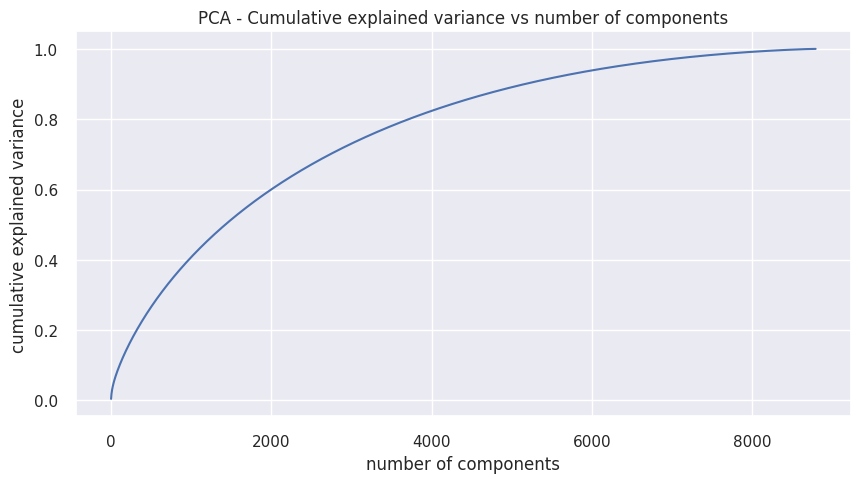

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~7700 components**.
* Also, more than **95%** of the variance is explained just by **6000 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 5000 components, which will still be able to capture more than 85% of variance.

In [ ]:
# reducing the dimensions to 6000 using pca
pca = PCA(n_components=6000,random_state=42)
pca.fit(X)

PCA(n_components=6000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(8794, 6000)

# **8. ML Model Implementation**

## **ML Model - 1 : K-Means Clustering**

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

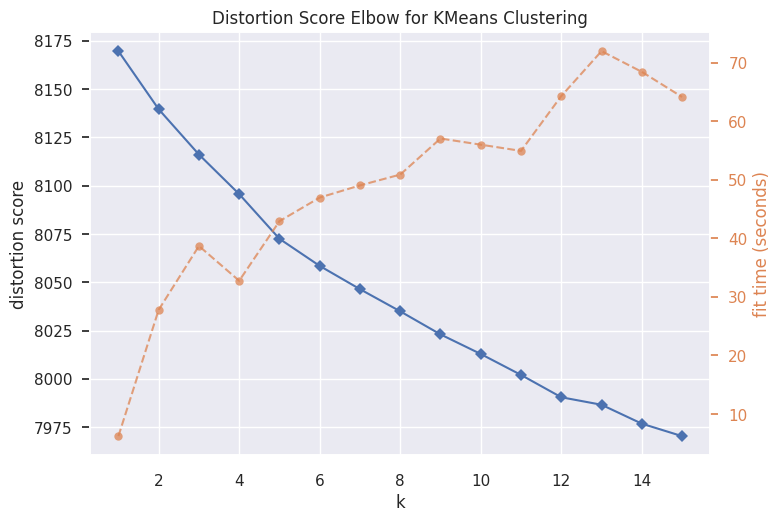

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer

# Importing necessary libraries

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer

visualizer.fit(x_pca)

# Finalize and render the figure

visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

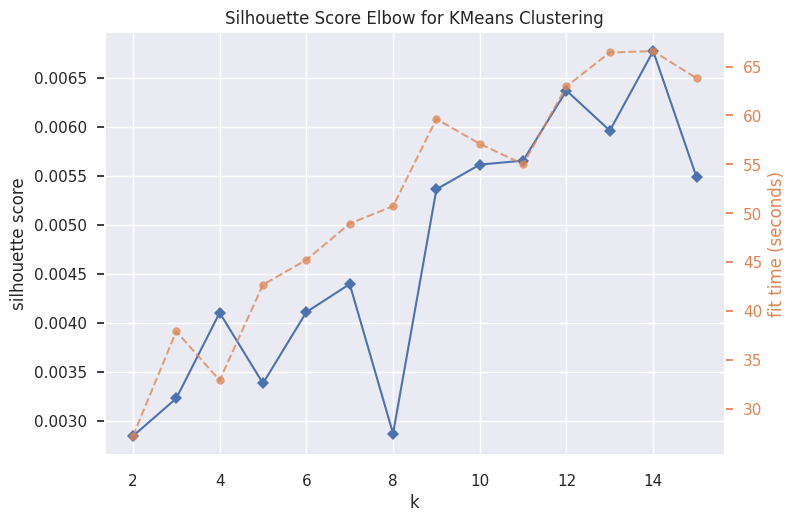

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer

# Importing needed library

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer

visualizer.fit(x_pca)

# Finalize and render the figure

visualizer.show()

In [ ]:
## Computing Silhouette score for each k

# Importing needed libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range

k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_pca)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.002775
k=3, Silhouette score=0.003452
k=4, Silhouette score=0.004341
k=5, Silhouette score=0.004851
k=6, Silhouette score=0.004429


From the above plots (Elbow plot and Silhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

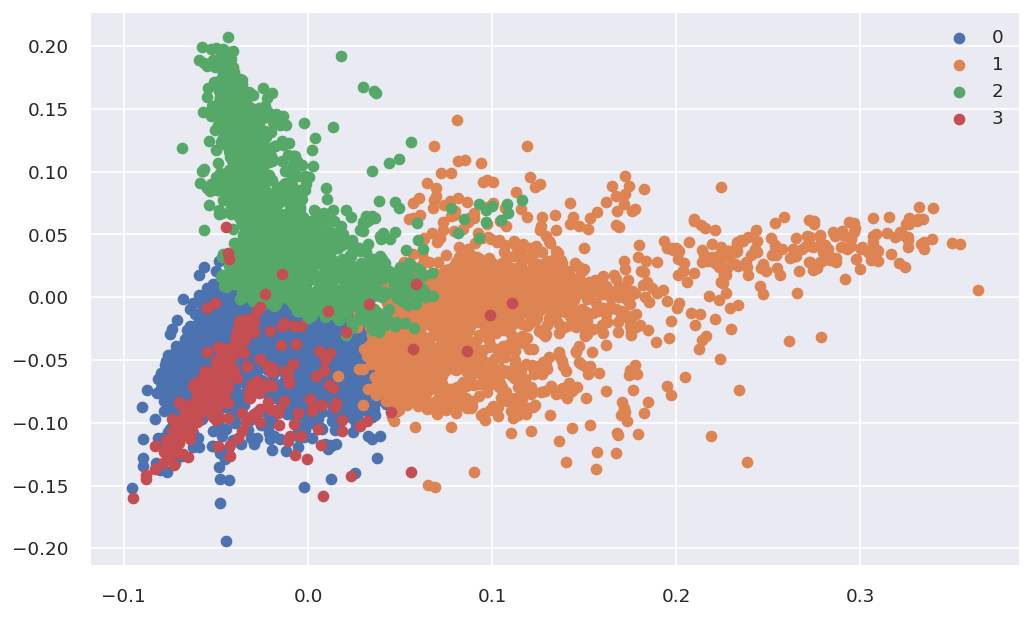

In [ ]:
#Training the K-means model on a dataset

kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#Predict the labels of clusters.

plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_pca)

#Getting unique labels

unique_labels = np.unique(label)

#Plotting the results:

for i in unique_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

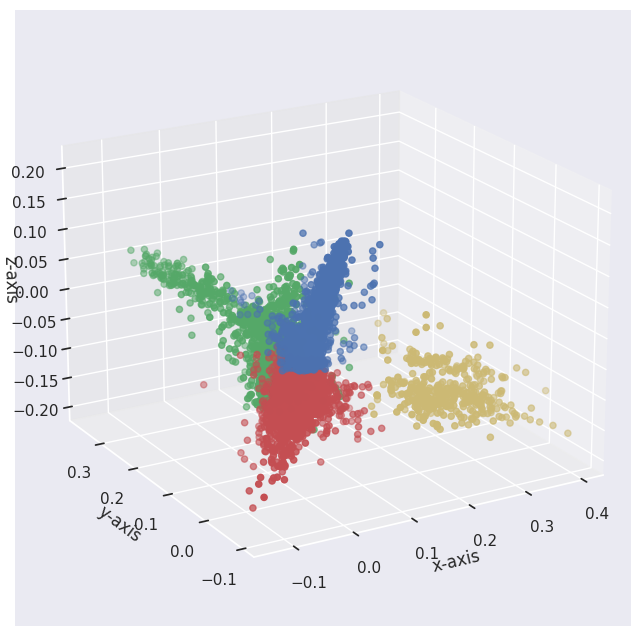

In [ ]:
# Importing library to visualize clusters in 3D

from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_pca[kmeans.labels_ == i, 2], x_pca[kmeans.labels_ == i, 0], x_pca[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis

ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Content' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.

df1['kmeans_cluster'] = kmeans.labels_

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries

    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name

    df_wordcloud = df1[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string

    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud

    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array

    image_array = wordcloud.to_array()

    # Return the numpy array

    return image_array

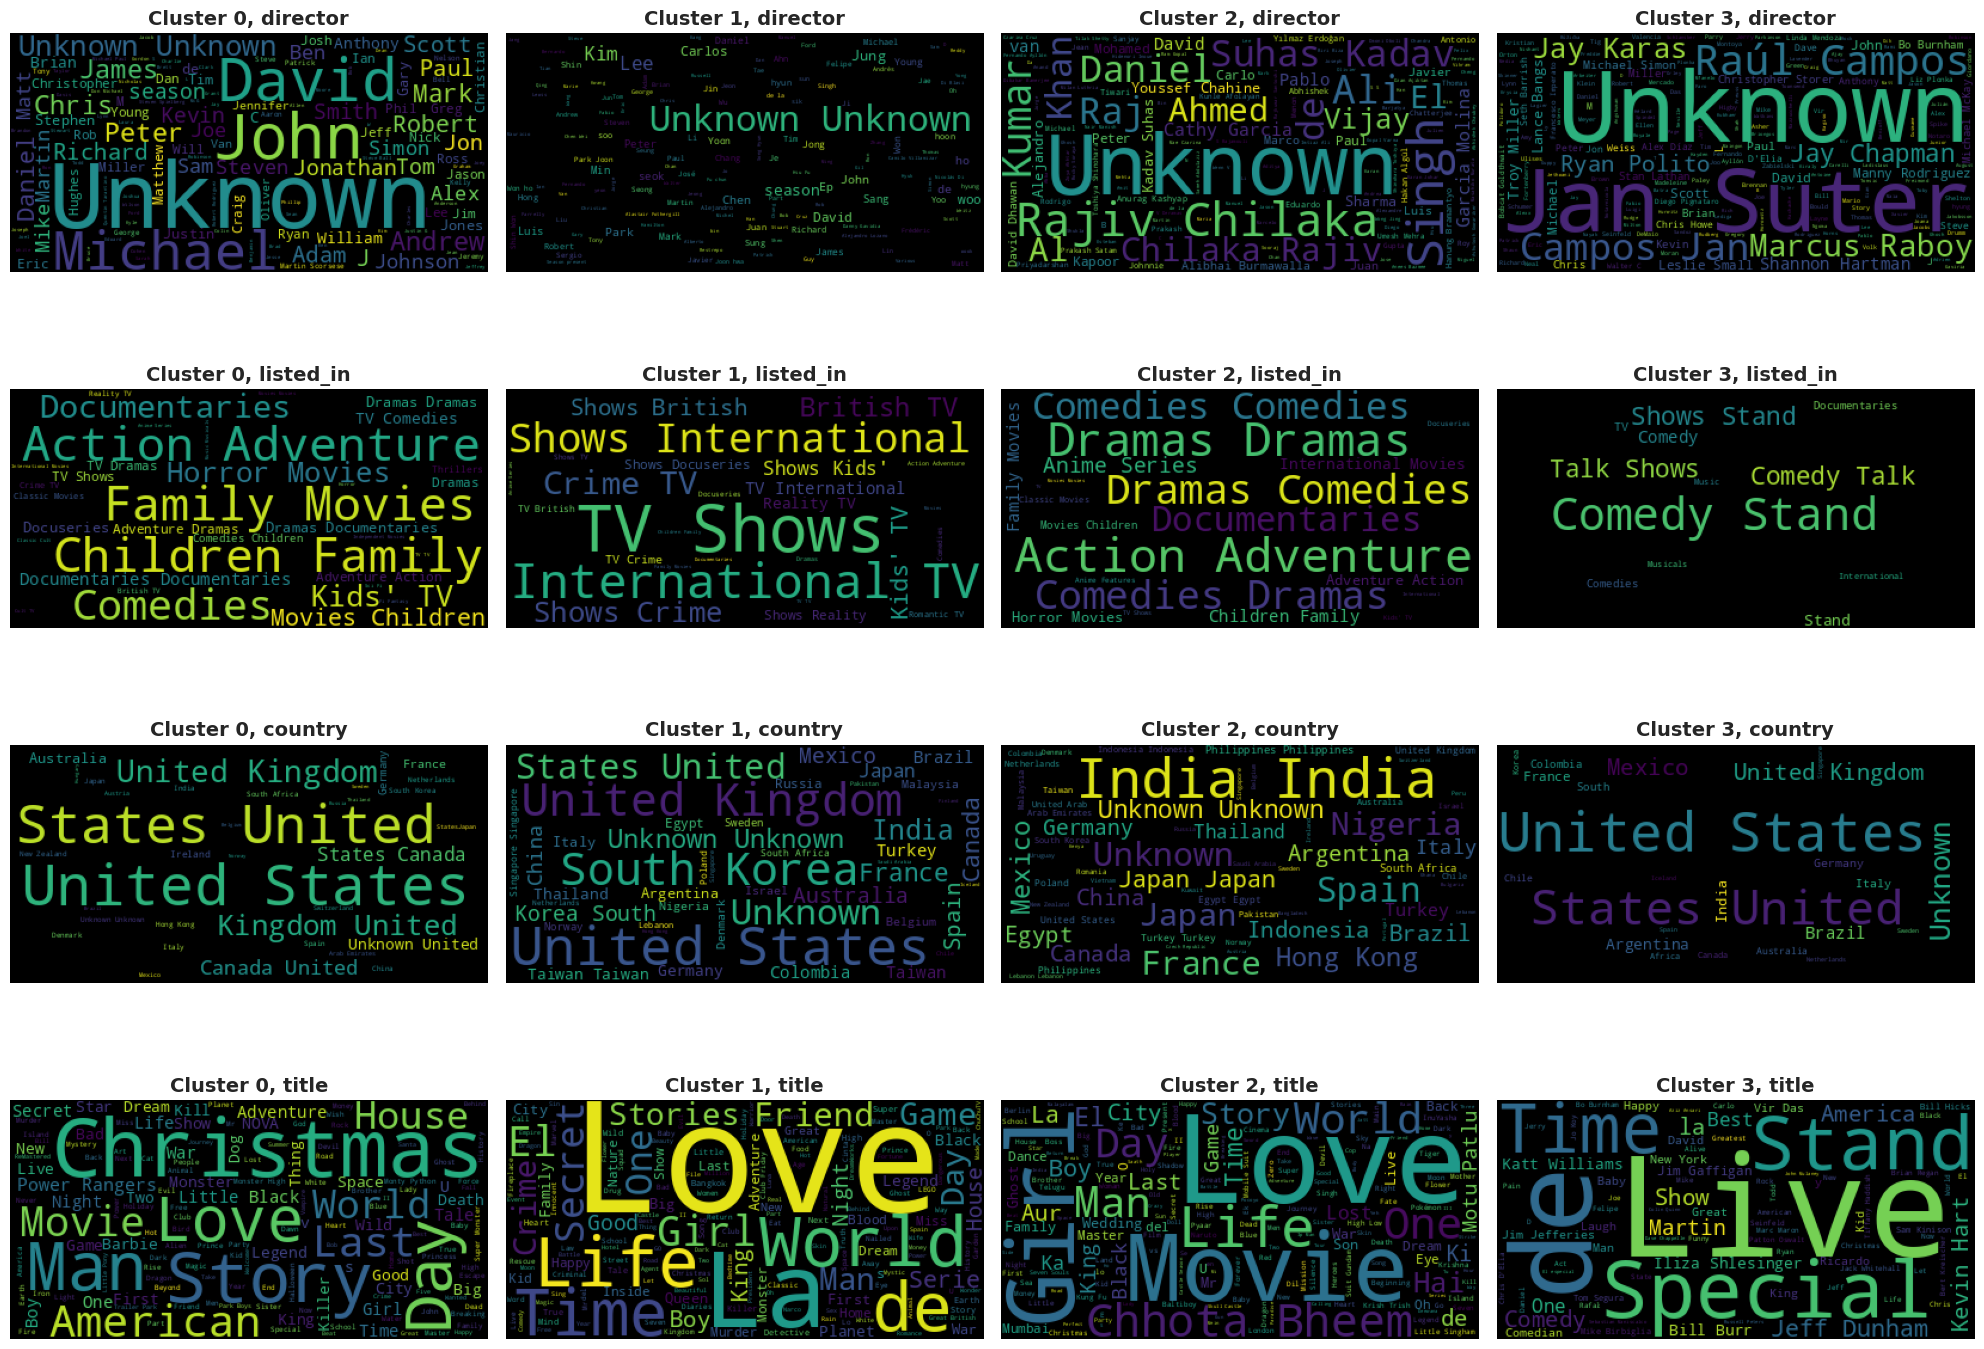

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **ML Model - 2 : Hierarchical clustering (Agglomerative clustering)**

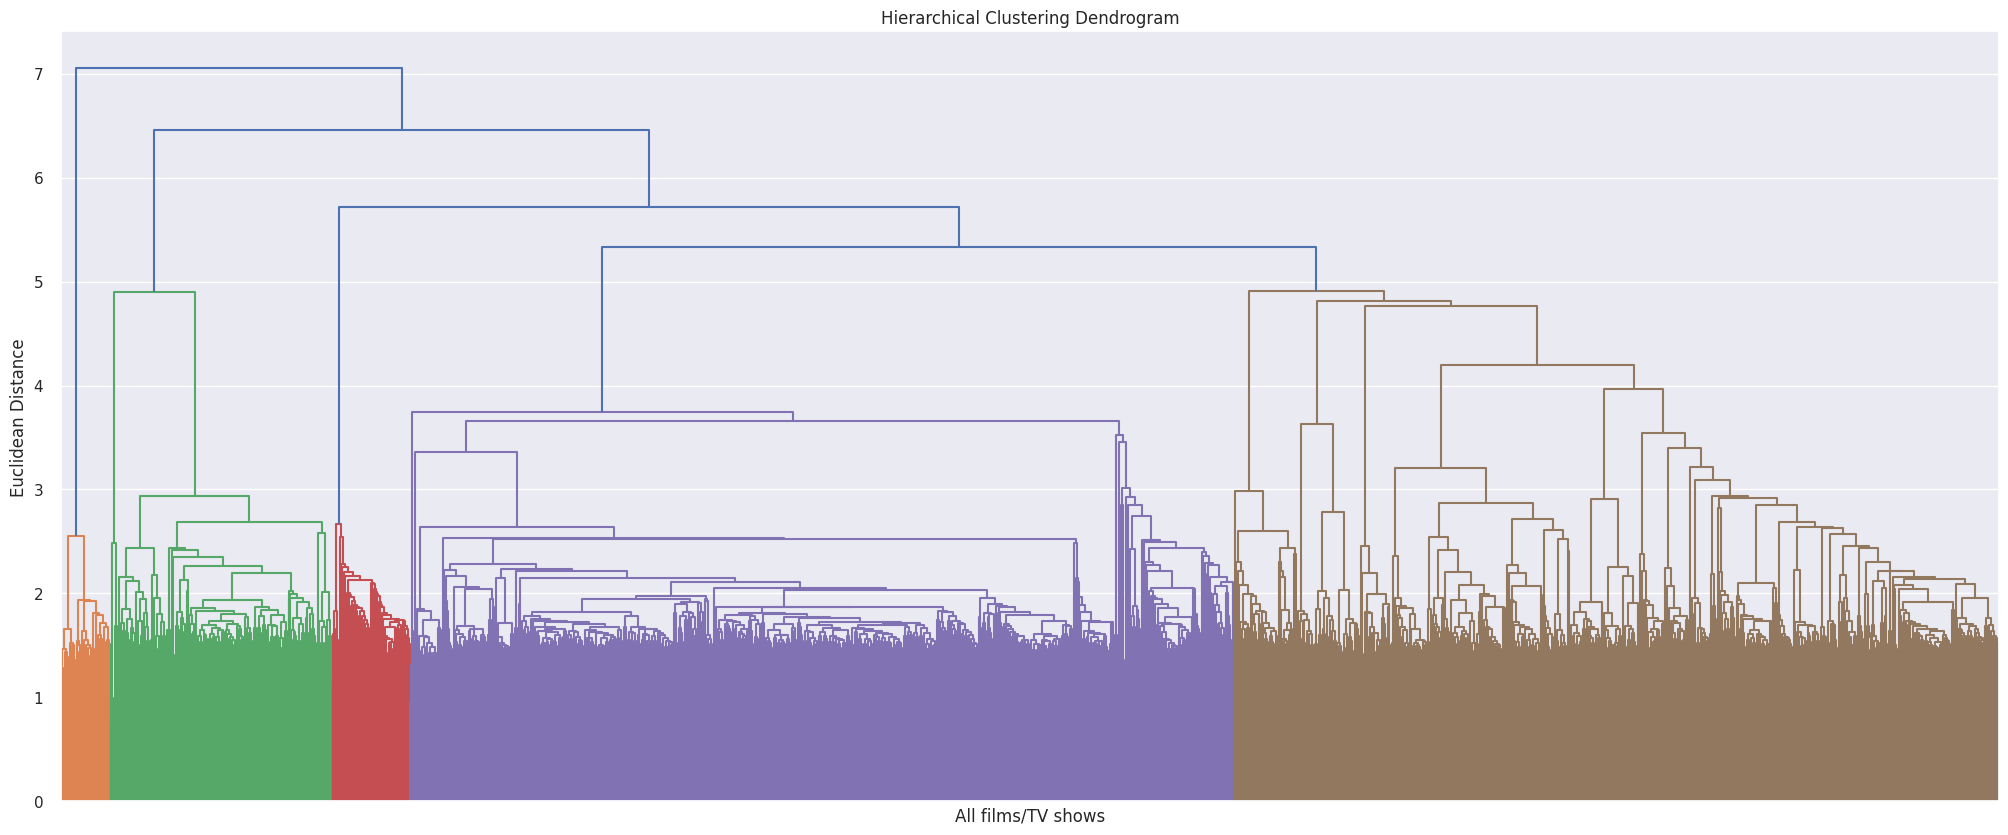

In [ ]:
#Importing needed libraries

from scipy.cluster.hierarchy import linkage, dendrogram

# Hierarchial Clustering

distances_linkage = linkage(x_pca, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

In [ ]:
## Computing Silhouette score for each k

# Importing needed libraries
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: ' '.join(map(str, x)))
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above

k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_pca)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.001545
k=3, Silhouette score=0.002264
k=4, Silhouette score=0.002205
k=5, Silhouette score=0.002737
k=6, Silhouette score=0.003298
k=7, Silhouette score=0.002958
k=8, Silhouette score=0.003379
k=9, Silhouette score=0.003836


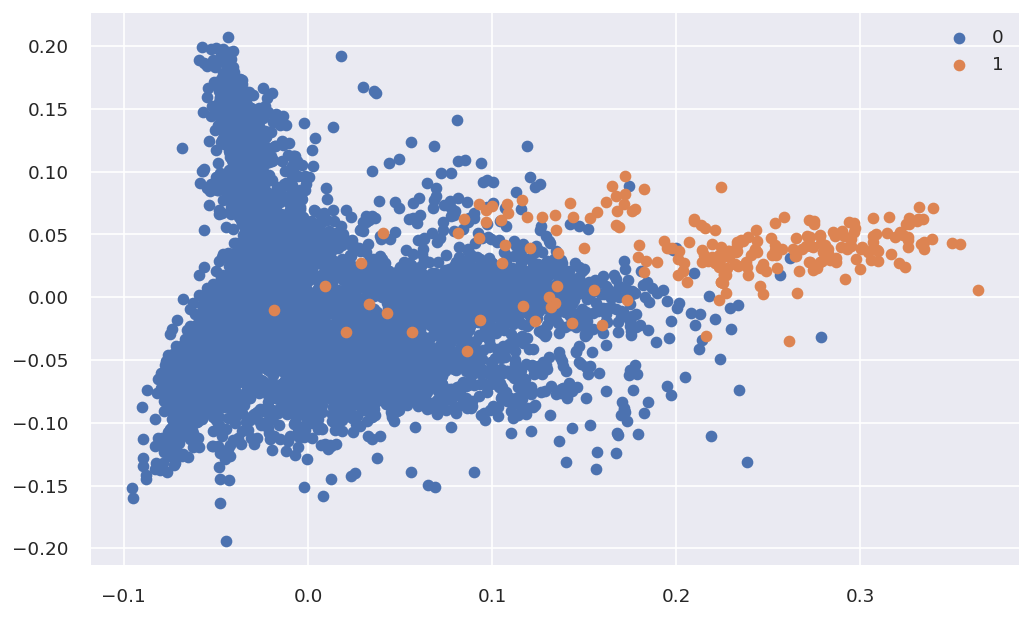

In [ ]:
#Training the K-means model on a dataset

Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#Predict the labels of clusters.

plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_pca)

#Getting unique labels

unique_labels = np.unique(label)

#Plotting the results:

for i in unique_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

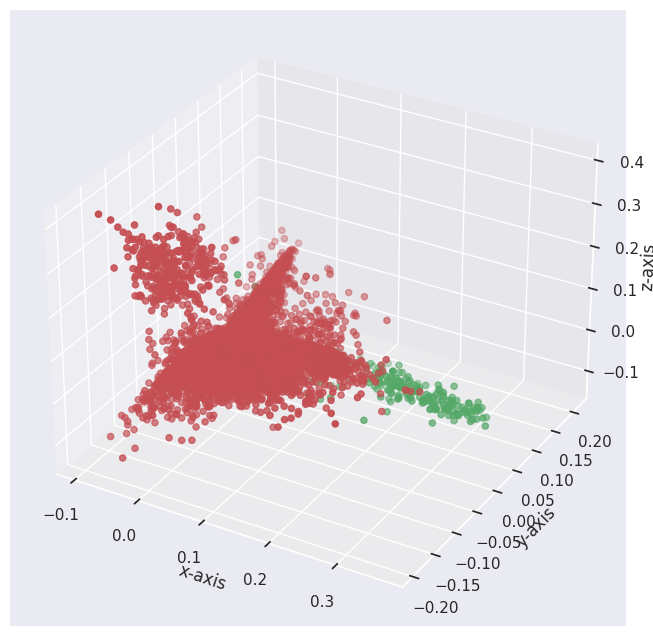

In [ ]:
# Importing library to visualize clusters in 3D

from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_pca[Agmodel.labels_ == i, 0], x_pca[Agmodel.labels_ == i, 1], x_pca[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [ ]:
# Add cluster values to the dateframe.

df1['agglomerative_cluster'] = Agmodel.labels_

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries

  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name

  df_wordcloud = df1[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string

  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud

  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object

  return wordcloud

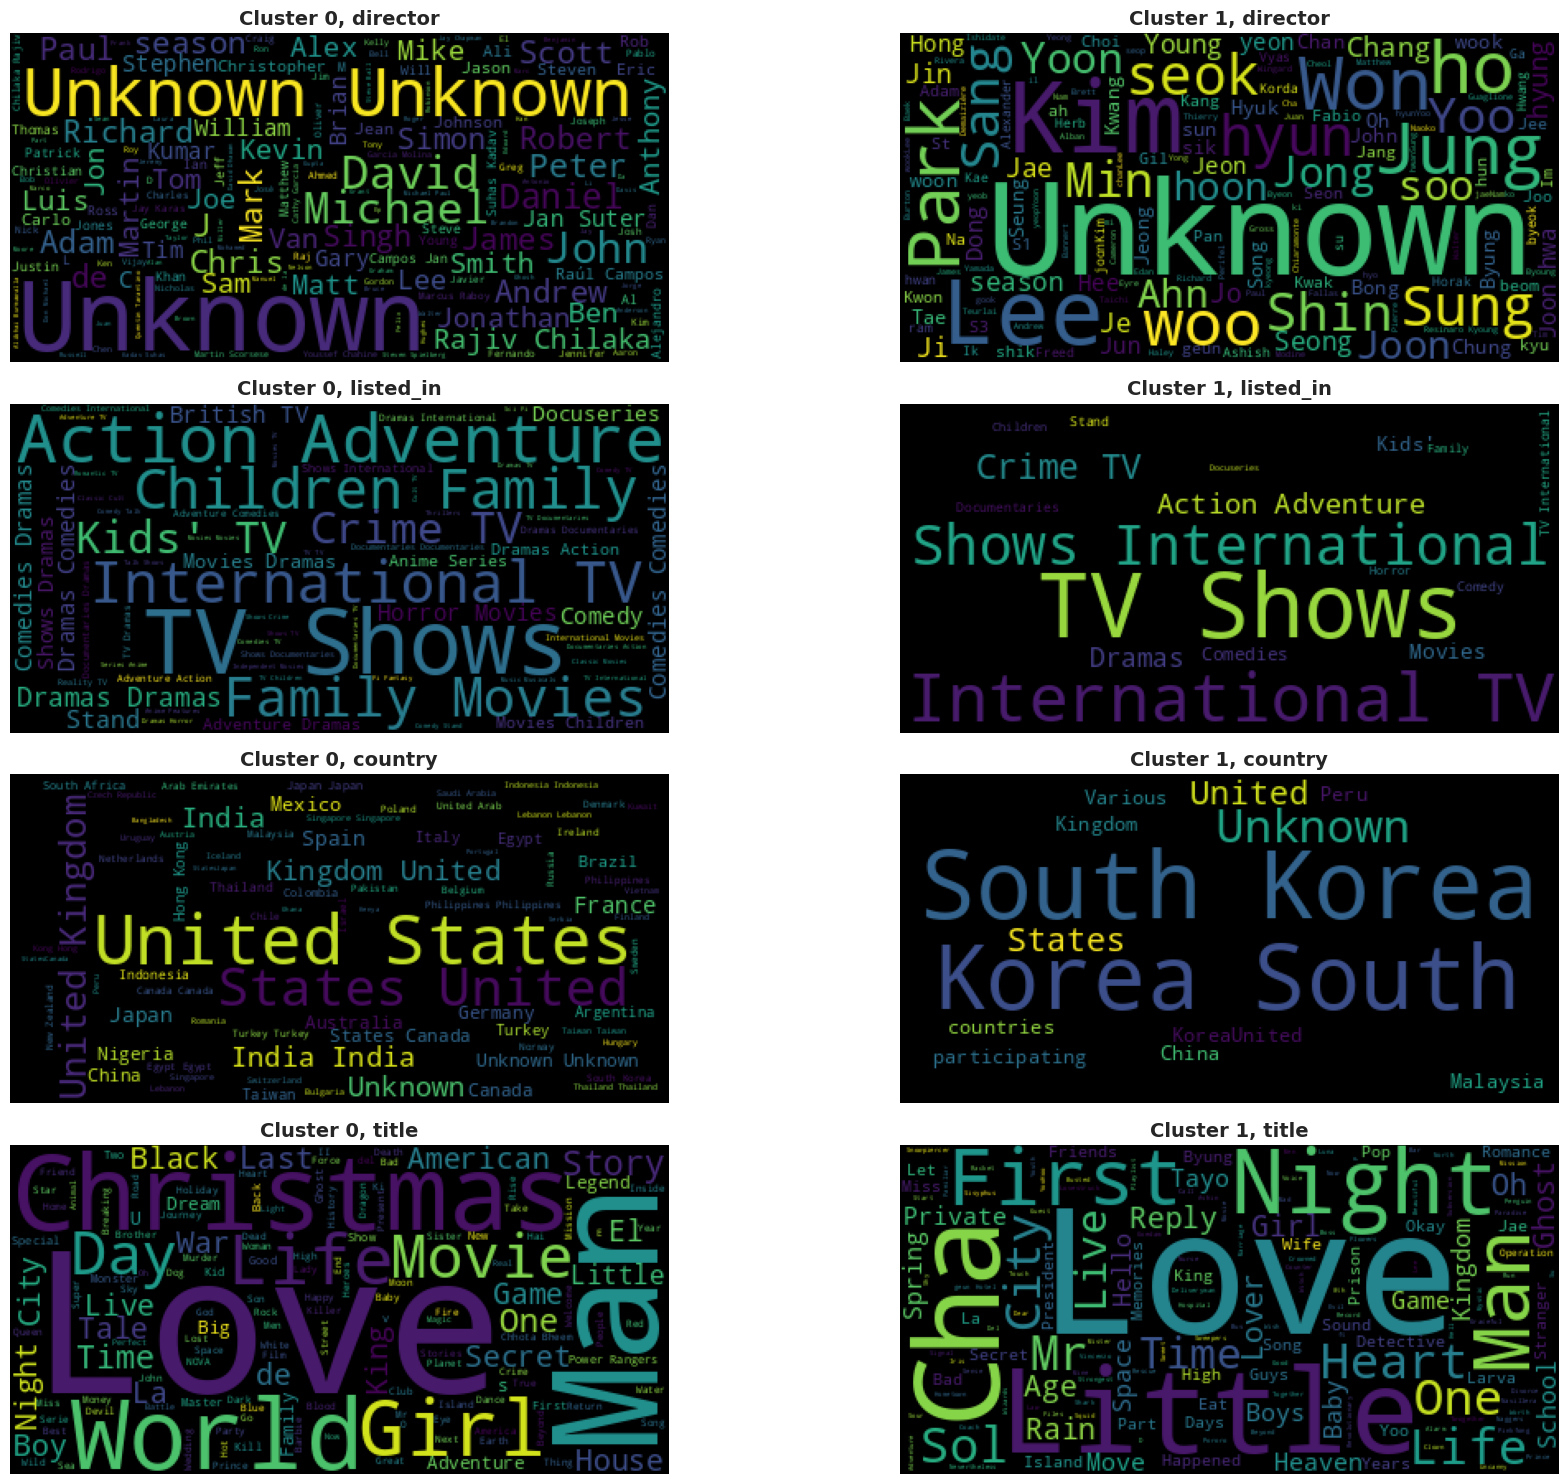

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **9. Recommendation System**

In [ ]:
# Importing needed libraries

from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df1['clustering_attributes'])

# Compute cosine similarity matrix

cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df1):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset

    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores

    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations

    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [ ]:
# Testing an Indian movie

recommend_content('Vivah')

Recommendation  Similarity_score(0-1)
0                              Prem Ratan Dhan Payo                 0.1878
1                               Hum Aapke Hain Koun                 0.1847
2  Shaurya: It Takes Courage to Make Right... Right                 0.1577
3                                   Maine Pyar Kiya                 0.1503
4                              Hum Saath-Saath Hain                 0.1500
5                             Together For Eternity                 0.1482
6                                        Satyagraha                 0.1427
7                                     A Flying Jatt                 0.1248
8                                        Ishq Vishk                 0.1212
9                                     Ek Hasina Thi                 0.1164

In [ ]:
# Testing a Non-Indian movie

recommend_content('Birth of the Dragon')

Recommendation  Similarity_score(0-1)
0                           Martial Arts of Shaolin                 0.1288
1                                    Man of Tai Chi                 0.1250
2                               The Wandering Earth                 0.1210
3                                   The Grandmaster                 0.1174
4  Crouching Tiger, Hidden Dragon: Sword of Destiny                 0.1151
5                             The Princess Weiyoung                 0.1138
6                               The Yin Yang Master                 0.1124
7                   Chhota Bheem: Master of Shaolin                 0.1118
8                               The Twins Effect II                 0.1079
9                                  Love on Delivery                 0.1062

In [ ]:
# Testing an Indian tv show

recommend_content('Humsafar')

Recommendation  Similarity_score(0-1)
0       Zindagi Gulzar Hai                 0.1287
1           Sadqay Tumhare                 0.1275
2          College Romance                 0.1019
3                   Janaan                 0.0963
4       Kuch Kuch Hota Hai                 0.0949
5           Dil Chahta Hai                 0.0943
6            Hello Brother                 0.0923
7  Jaane Tu... Ya Jaane Na                 0.0916
8            Pinky Memsaab                 0.0902
9    Ek Khiladi Ek Haseena                 0.0867

In [ ]:
# Testing a Non-Indian tv show

recommend_content('Scream')

Recommendation  Similarity_score(0-1)
0    Voltron: Legendary Defender                 0.1118
1                      Hell Fest                 0.1090
2     Tom Segura: Mostly Stories                 0.0957
3                        Dare Me                 0.0954
4           Tom Segura: Ball Hog                 0.0947
5  Tom Segura: Completely Normal                 0.0874
6        Tom Segura: Disgraceful                 0.0852
7    How to Get Away with Murder                 0.0808
8                    Bates Motel                 0.0786
9                  L.A.’s Finest                 0.0746

# **CONCLUSION**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

* Movies make up about **two-thirds of Netflix content, with TV shows comprising the remaining one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

* **Jan Suter** is the most common movie director, and **Ken Burns** is the most common TV show director on Netflix.

* The **United States** is the largest producer of movies and TV shows on Netflix, followed by **India**. **Japan** and **South Korea** have more TV shows than movies, indicating growth potential in that area.

* **International movies, drama, and comedy** are the most popular genres on Netflix.

* TV show additions on Netflix have increased since **2018**, while movie additions have decreased. In **2020**, fewer movies were added compared to **2019**, but more TV shows were added.

* Most movies on Netflix have durations between **80 to 120 minutes**, while TV shows commonly have **one or two seasons**.

**Based on ML clustering models**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.